In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Galtons Height Data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Family  898 non-null    int64  
 1   Father  898 non-null    float64
 2   Mother  898 non-null    float64
 3   Gender  898 non-null    object 
 4   Height  898 non-null    float64
 5   Kids    898 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 42.2+ KB


In [4]:
data.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [5]:
data['Father']=2.54*data['Father']
data['Mother']=2.54*data['Mother']
data['Height']=2.54*data['Height']

In [6]:
data.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,199.39,170.18,M,185.928,4
1,1,199.39,170.18,F,175.768,4
2,1,199.39,170.18,F,175.260,4
3,1,199.39,170.18,F,175.260,4
4,2,191.77,168.91,M,186.690,4


In [7]:
data.describe()

,Family,Father,Mother,Height,Kids
count,898.000000,898.000000,898.000000,898.000000,898.000000
mean,105.216036,175.851441,162.774401,169.572154,6.135857
std,57.189899,6.274450,5.859844,9.100613,2.685156
min,1.000000,157.480000,147.320000,142.240000,1.000000
25%,58.000000,172.720000,160.020000,162.560000,4.000000
50%,105.000000,175.260000,162.560000,168.910000,6.000000
75%,155.750000,180.340000,166.370000,177.038000,8.000000
max,205.000000,199.390000,179.070000,200.660000,15.000000


In [8]:
pd.get_dummies(['F','M'])

,F,M
0,1,0
1,0,1


In [9]:
gender = pd.get_dummies(data['Gender'],drop_first=True)


In [10]:
gender

,M
0,1
1,0
2,0
3,0
4,1
...,...
893,1
894,1
895,0
896,0


In [11]:
data.drop(['Gender','Family'],axis=1,inplace=True)


In [12]:
data.head()

,Father,Mother,Height,Kids
0,199.39,170.18,185.928,4
1,199.39,170.18,175.768,4
2,199.39,170.18,175.260,4
3,199.39,170.18,175.260,4
4,191.77,168.91,186.690,4


In [13]:
data = pd.concat([data,gender],axis=1)

In [14]:
data.head()

,Father,Mother,Height,Kids,M
0,199.39,170.18,185.928,4,1
1,199.39,170.18,175.768,4,0
2,199.39,170.18,175.260,4,0
3,199.39,170.18,175.260,4,0
4,191.77,168.91,186.690,4,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Father  898 non-null    float64
 1   Mother  898 non-null    float64
 2   Height  898 non-null    float64
 3   Kids    898 non-null    int64  
 4   M       898 non-null    uint8  
dtypes: float64(3), int64(1), uint8(1)
memory usage: 29.1 KB


# Train Model

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Height',axis=1), 
                                                    data['Height'], test_size=0.30, 
                                                    random_state=101)

In [18]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

      Father  Mother  Kids  M
268  179.070  165.10     5  0
681  172.720  149.86    10  1
655  173.228  161.29     5  0
452  175.260  168.91     6  0
2    199.390  170.18     4  0
..       ...     ...   ... ..
575  172.720  166.37     7  0
838  165.100  165.10     9  0
337  177.800  162.56     9  1
523  175.260  158.75     8  0
863  166.370  152.40     5  1

[628 rows x 4 columns]
      Father   Mother  Kids  M
493  175.260  160.020     6  1
237  177.800  175.260     6  1
194  180.340  160.020     9  1
218  180.340  158.750     5  0
388  177.800  154.940     2  1
..       ...      ...   ... ..
392  177.800  152.400     4  0
586  173.990  165.100     8  0
281  177.800  165.100     5  0
429  175.260  169.418     6  1
485  175.768  162.560     4  0

[270 rows x 4 columns]
268    154.94
681    162.56
655    163.83
452    160.02
2      175.26
        ...  
575    156.21
838    154.94
337    177.80
523    157.48
863    172.72
Name: Height, Length: 628, dtype: float64
493    177.800
237    17

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

# Test Model

In [30]:
predictions = lm.predict(X_test)

In [31]:
predictions

array([174.29187228, 180.69686899, 175.78110215, 163.4276542 ,
       174.18188795, 161.94227911, 177.6152657 , 176.92328114,
       172.94514379, 164.99435134, 157.41552738, 166.47674043,
       177.32233819, 181.87156503, 176.57150667, 162.97745977,
       158.97451494, 170.00691068, 161.97865096, 176.35219164,
       163.63692728, 168.84073606, 176.4769415 , 176.90080603,
       175.73685874, 166.13403407, 178.99836603, 163.04721747,
       171.71322825, 164.06178118, 157.41552738, 166.13403407,
       173.98504803, 182.31790467, 164.26214014, 177.97708211,
       177.78344336, 163.43150899, 176.25610406, 172.39267461,
       168.10548569, 180.11019835, 169.44287714, 166.75104762,
       163.94760632, 170.41600968, 163.94760632, 160.91008445,
       176.29806827, 177.78344336, 176.64897394, 160.91008445,
       177.29986308, 173.72849236, 173.73554831, 164.66825315,
       163.95565164, 177.6152657 , 178.61407452, 170.77646756,
       159.80129131, 174.36162997, 155.87130534, 170.00

In [32]:
import matplotlib.pyplot as plt

%matplotlib inline

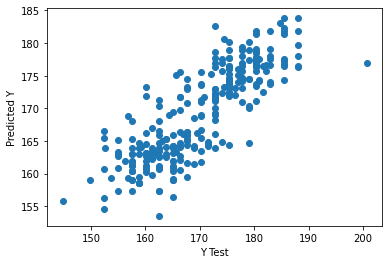

In [33]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y');

In [34]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 4.1532530072306075


In [35]:
            #Father   Mother  Kids  Male?
lm.predict([[188.0 , 170.0  ,   1,  1]])

array([183.7188908])

In [36]:
            #Father   Mother  Kids  Male?
lm.predict([[200.0 , 180.0  ,   1,  0]])

array([179.40933889])

In [37]:
            #Father   Mother  Kids  Male?
lm.predict([[179.0 , 162.0  ,   1,  0]])

array([164.73889206])

In [38]:
            #Father   Mother  Kids  Male?
lm.predict([[179.0 , 162.0  ,   1,  1]])

array([177.33027536])